### Perceptron – Single artificial neuron

Inspired by the biological neurons, McCulloch and Pitts in 1943 introduced the concept of perceptron as an artificial neuron which are the basic building block of artificial neural network. They are not only named after their biological counterparts but also modeled after the behavior of the neurons in our brain.

Biological neuron has dendrites to receive signals, a cell body to process them and an axon/axon terminal to transfer signals out to other neurons. Similarly artificial neuron has multiple input channels to accept training samples represented as a vector, a processing stage where the weights w are adjusted such that the output error (actual vs predicted) is minimized. Then the result is fed into an activation function to produce output, for example a classification label. Activation function for a classification problem is a threshold cutoff above which class is 1 else 0.

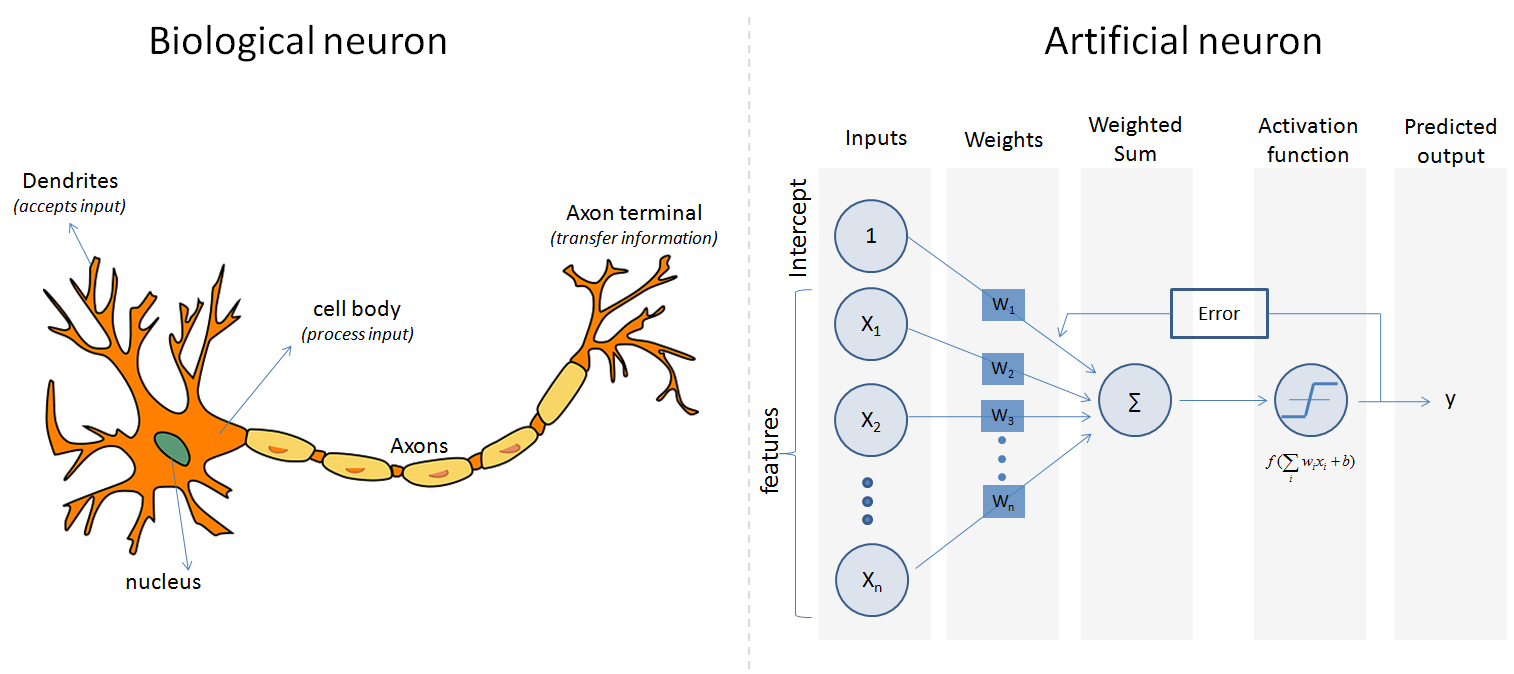

In [8]:
from IPython.display import Image
Image(filename='../Chapter 6 Figures/Neuron.png', width=800)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Needed to show the plots inline
%matplotlib inline

# import sklearn.linear_model.perceptron
from sklearn.linear_model import perceptron

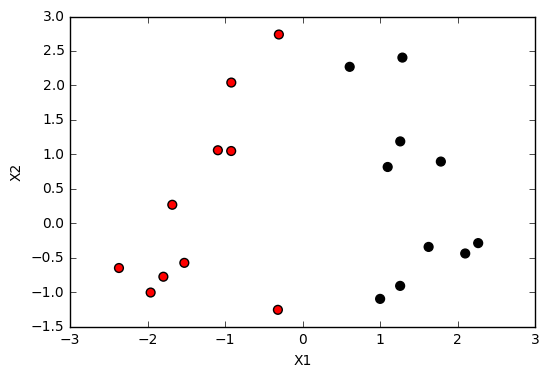

In [10]:
# Let's use sklearn make_classification function to create some test data.
from sklearn.datasets import make_classification
X, y = make_classification(20, 2, 2, 0, weights=[.5, .5], random_state=2017) 

# plot the data
colormap = np.array(['r', 'k'])
plt.scatter(X[:,0], X[:,1], c=colormap[y], s=40)
plt.xlabel('X1')
plt.ylabel('X2')

In [13]:
# Create the model
clf = perceptron.Perceptron(n_iter=100, verbose=0, random_state=2017, fit_intercept=True, eta0=0.002)
clf.fit(X,y)

# Print the results
print "Prediction: " + str(clf.predict(X))
print "Actual:     " + str(y)
print "Accuracy:   " + str(clf.score(X, y)*100) + "%"

# Output the values
print "X1 Coefficient: " + str(clf.coef_[0,0])
print "X2 Coefficient: " + str(clf.coef_[0,1])
print "Intercept:      " + str(clf.intercept_)

Prediction: [1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1]
Actual:     [1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1]
Accuracy:   100.0%
X1 Coefficient: 0.00575308754305
X2 Coefficient: 0.00107517941422
Intercept:      [-0.002]


### Plot the decision boundary

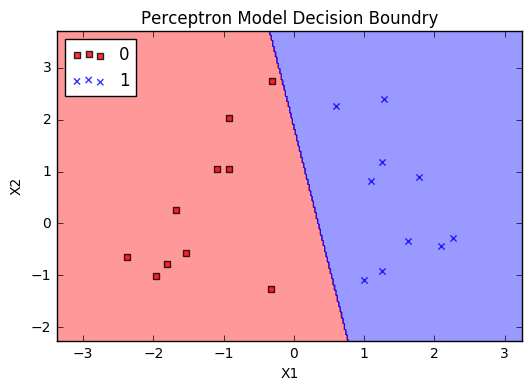

In [14]:
def plot_decision_regions(X, y, classifier):
    
    h = .02  # step size in the mesh
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                           np.arange(x2_min, x2_max, h))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)
        
# Plot the decision boundary
plot_decision_regions(X, y, classifier=clf)
plt.title('Perceptron Model Decision Boundry')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='upper left')
plt.show()